11/5/24

Bagging: A model that iterates through models parralel and combines at the end for determining the model's average.

Boosting: A model that iterates sequentially then grows to adapt to other models through the process. 

In [15]:
a = [5, 10, 15, 20]

def swap_pos(fp:int, sp:int, lm:list):
    """
    Swaps the position of the list. 10, 20, 30, 40 turns to 10, 30, 20, 40
    """
    lm[fp], lm[sp] = lm[sp], lm[fp]
    return lm


In [16]:
swap_pos(1, 2, a)

[5, 15, 10, 20]

ROC: Recieving Operating Characteristic Curve. Show the performance of a model at all thresholds.Calculates tpr and fpr.  

AOC: Area under the curve, compares with the ROC curve. Measures under the ROC curve, also used to measure performance. 

Unsupervised Learning: Finding patterns in unlabeled data.
Main approaches come to Clustering (K-means, Hierachchical, grid based) and Dimensional Reduction (linear and non-linear)

Clustering: A process that looks for inherent groupings within data. K-means randomly assigns a mean value for each of the K clusters. 
Then all the vaules are assigned to the closetn mean. Finally, the means of theose clusters are recalculated based on the actual valuesm and 
the process repeats until this mean is closest to the mean of the vaules in the cluster. 

Heirachical takes a tree based approach and groups items based on proximity.

11/7/24

AOC stands for area under the curve, comparing and showing the performance between two different models. ROC and AUC are used with a balanced data set. If imbalanced precision-recall graphs work better.

In [ ]:
numbers = [10, 20, 30, 40, 50]
average = calculate_average(numbers)
print("The average is:", average)

In [30]:
def average(n):
    numbers = [10, 20, 30, 40, 50]

    average = sum(numbers) / len(numbers)
    print("The average is:", average)
    


In [32]:
average(numbers)

The average is: 30.0


Unsupervised Learning Code

In [41]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

cd = pd.read_csv("USArrests.csv")
cd.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


Clustering

<function matplotlib.pyplot.xlabel(xlabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['left', 'center', 'right'] | None" = None, **kwargs) -> 'Text'>

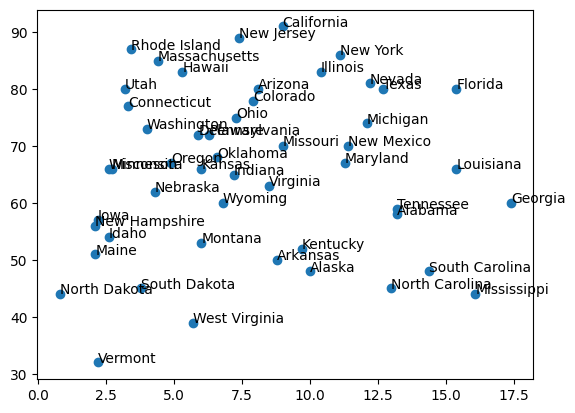

In [40]:
from sklearn.cluster import KMeans

X = cd.drop('State',axis=1)
y = cd['State']

plt.scatter(X['Murder'], X['UrbanPop'])
# allows us to keep track of each iteration
for i, txt in enumerate(y):
    plt.annotate(txt, (X['Murder'][i], X['UrbanPop'][i]))

plt.xlabel(

In [43]:
inertias = []
distortions = [] 

for k in range(1,10):
    # build/fit the model
    model = KMeans(n_clusters=k).fit(X)

    #Distrotion is the avergae of the squared distance from the cluster center to the datapoints. 
    #Euclidean  is a standard 2+ dimensional space
    distance = cdist(X, model.cluster_centers_,
                    'euclidean')
    distortion = sum(np.min(distance, axis=1))/X.shape[0]
    distortions.append(distortion)

    #inertia is calculated by measuring the distance bewteen the data points and centrods, then summing the square across the clster.
    #a good model hos no clusters, and low inertia/distortions.

    inertia = model.inertia_
    inertias.append(inertia)

Text(0.5, 1.0, 'Elbow Method')

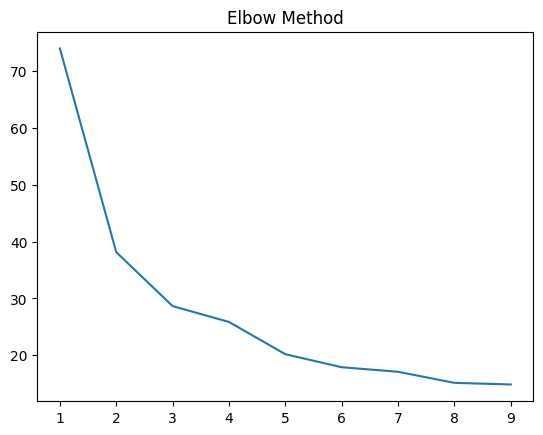

In [46]:
plt.plot(range(1,10), distortions)
plt.title('Elbow Method')

Text(0.5, 1.0, 'Elbow Method')

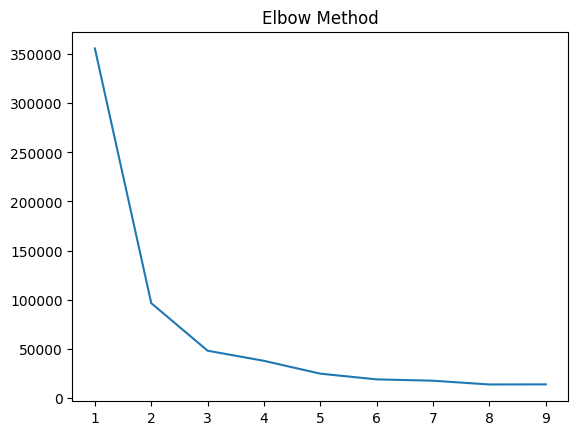

In [48]:
plt.plot(range(1,10), inertias)
plt.title('Elbow Method')

Heirachical

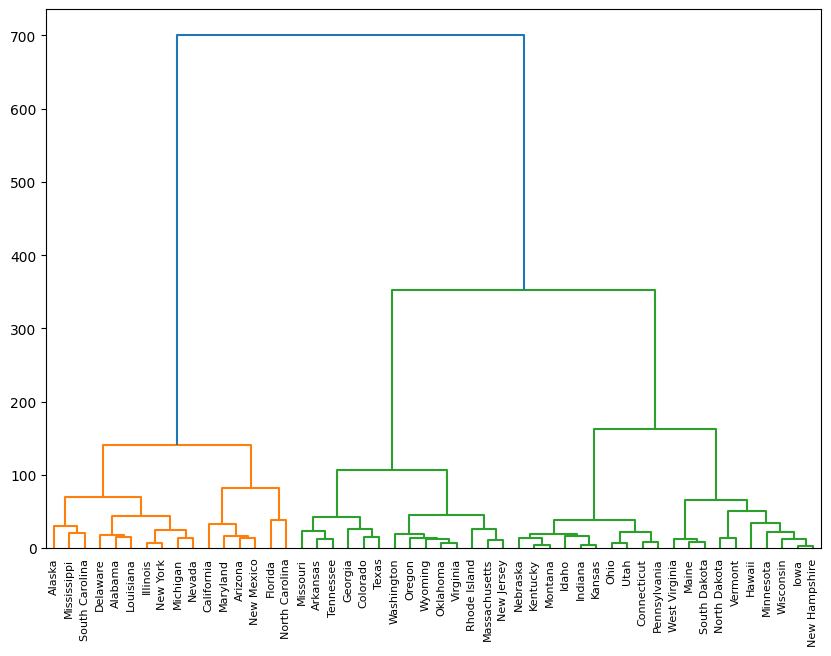

In [50]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(X, 'ward')
plt.figure(figsize=(10,7))

dendro = dendrogram(linked, labels = list(y))

In [51]:
from sklearn.cluster import AgglomerativeClustering 
#divide the population into different clusters so the datapoints are in the same cluster as others that are similar. 
#Those in differenct clusters are dissimlar

cluster = AgglomerativeClustering(n_clusters=3, linkage = 'ward')
cluster.fit_predict(X)

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2])

Text(0, 0.5, 'Urban Pop.')

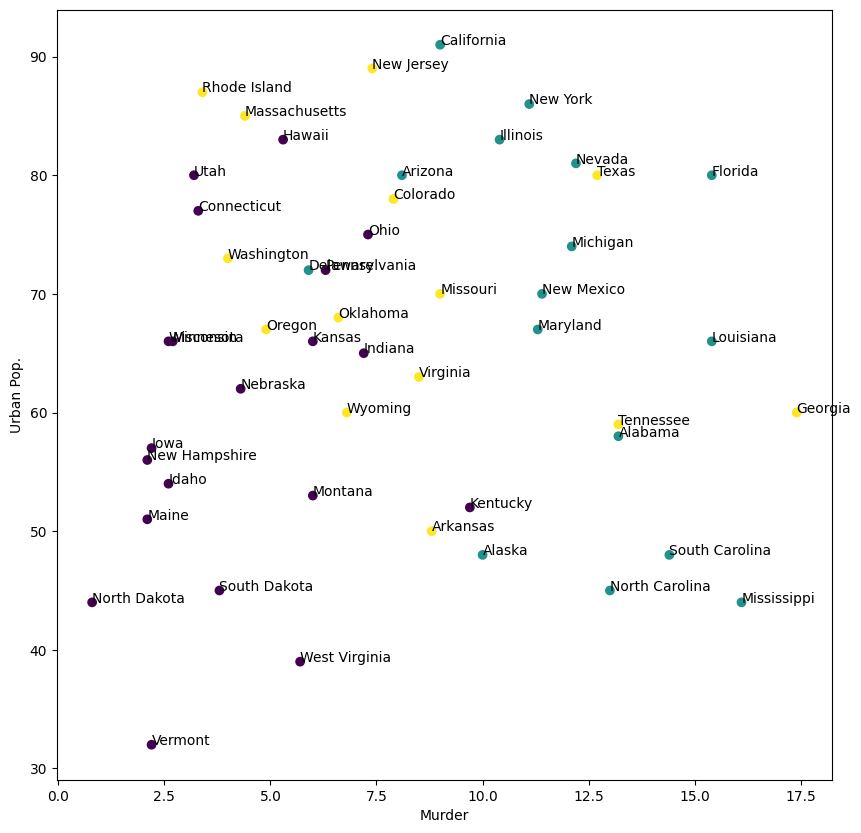

In [55]:
plt.figure(figsize=(10,10))
plt.scatter(X['Murder'], X['UrbanPop'], c=cluster.labels_)
for i, txt in enumerate(y):
    plt.annotate(txt, (X['Murder'][i], X['UrbanPop'][i]))

plt.xlabel('Murder')
plt.ylabel('Urban Pop.')

Dimensionality Reduction

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('diabetes.csv')

X = df.drop('Outcome',axis=1)
y = df['Outcome']

#split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=42)

model = LogisticRegression(random_state=42).fit(X,y)

#predict outcome and save as variable
y_predicted = model.predict(X_test)

print(model.score(X_test, y_test))
    


0.7792207792207793


c:\users\steven\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#singular valye decomposition = factorization 
#techinque for real/complex numbers in a matrix, it's untangling patterns in numbers using matrix decomp. 
#Truncated SVD is used for sparse data sets and it doesnt produce a list of the features it's selecting.